# Modelo de regressão linear

**Modelo de regressão linear**: Acuracia para fazer a classificação do modelo e o algoritmo naive bayes, RMSE Erro Quadrático Médio.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dados = pd.read_csv("Dados\housing.csv")
dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
dados.columns = ["longitude", "latitude", "habitação", "quartos", "dormir",  "população", "domicílios", "renda", "valor", "proximidade do oceano"]
dados.head(10)

,longitude,latitude,habitação,quartos,dormir,população,domicílios,renda,valor,proximidade do oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
dados.head(10)

,longitude,latitude,habitação,quartos,dormir,população,domicílios,renda,valor,proximidade do oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
dados.shape

(20640, 10)

In [6]:
dados.describe()

,longitude,latitude,habitação,quartos,dormir,população,domicílios,renda,valor
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
sorted(dados['habitação'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0]

In [8]:
sorted(dados['renda'].unique())

[0.4999,
 0.536,
 0.5495,
 0.6433,
 0.6775,
 0.6825,
 0.6831,
 0.696,
 0.6991,
 0.7007,
 0.7025,
 0.7054,
 0.7068,
 0.7069,
 0.7075,
 0.716,
 0.7235,
 0.7286,
 0.7403,
 0.7445,
 0.7473,
 0.75,
 0.7526,
 0.7591,
 0.76,
 0.7683,
 0.7684,
 0.7685,
 0.7714,
 0.78,
 0.7917,
 0.799,
 0.8012,
 0.8024,
 0.8026,
 0.8054,
 0.8056,
 0.8075,
 0.8106,
 0.813,
 0.8131,
 0.8172,
 0.8185,
 0.8198,
 0.8229,
 0.8246,
 0.8252,
 0.8288,
 0.8351,
 0.8362,
 0.8438,
 0.8440000000000001,
 0.8478,
 0.8527,
 0.8543,
 0.8571,
 0.8585,
 0.8639,
 0.8641,
 0.8658,
 0.8668,
 0.8691,
 0.8702,
 0.8738,
 0.8804,
 0.8836,
 0.8894,
 0.8907,
 0.8926,
 0.8928,
 0.8941,
 0.8952,
 0.8964,
 0.8984,
 0.8991,
 0.9,
 0.9011,
 0.9142,
 0.9166,
 0.9196,
 0.9204,
 0.9218,
 0.922,
 0.9227,
 0.9234,
 0.9241,
 0.9274,
 0.9283,
 0.9288,
 0.9298,
 0.9304,
 0.9318,
 0.9336,
 0.9337,
 0.9338,
 0.9355,
 0.9365,
 0.9379,
 0.9393,
 0.9407,
 0.9437,
 0.9463,
 0.9490000000000001,
 0.9506,
 0.9513,
 0.9518,
 0.9563,
 0.9566,
 0.9570000000000001

**Mediana, média, moda, desvio padrão**

In [9]:
dados["renda"].median()

3.5347999999999997

In [10]:
dados["valor"].median()

179700.0

In [11]:
dados["população"].median()

1166.0

In [12]:
dados["valor"].mean()

206855.81690891474

In [13]:
dados["renda"].mean()

3.8706710029070246

In [14]:
dados["população"].mean()

1425.4767441860465

In [15]:
dados["valor"].mode()

0    500001.0
dtype: float64

In [16]:
dados["renda"].mode()

0     3.1250
1    15.0001
dtype: float64

In [17]:
dados["população"].mode()

0    891.0
dtype: float64

In [18]:
dados["valor"].std()

115395.6158744132

In [19]:
dados["população"].std()

1132.4621217653375

In [20]:
dados["renda"].std()

1.8998217179452732

In [21]:
dados.median()

longitude       -118.4900
latitude          34.2600
habitação         29.0000
quartos         2127.0000
dormir           435.0000
população       1166.0000
domicílios       409.0000
renda              3.5348
valor         179700.0000
dtype: float64

In [22]:
dados.max()

longitude                   -114.31
latitude                      41.95
habitação                        52
quartos                       39320
dormir                         6445
população                     35682
domicílios                     6082
renda                       15.0001
valor                        500001
proximidade do oceano    NEAR OCEAN
dtype: object

In [23]:
dados.min()

longitude                  -124.35
latitude                     32.54
habitação                        1
quartos                          2
dormir                           1
população                        3
domicílios                       1
renda                       0.4999
valor                        14999
proximidade do oceano    <1H OCEAN
dtype: object

# Analise de dados

In [24]:
dados.corr()

,longitude,latitude,habitação,quartos,dormir,população,domicílios,renda,valor
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
habitação,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
quartos,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
dormir,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
população,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
domicílios,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
renda,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
valor,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


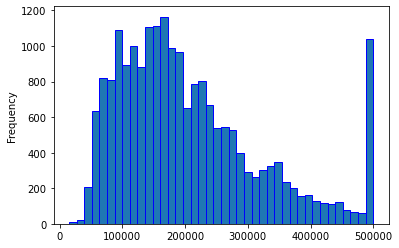

In [25]:
dados["valor"].plot.hist(bins=40, edgecolor="Blue")

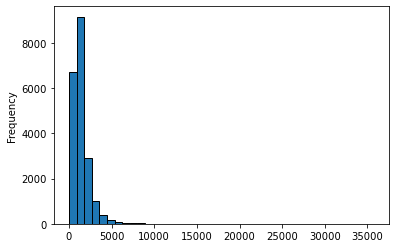

In [26]:
dados["população"].plot.hist(bins=40, edgecolor="black")

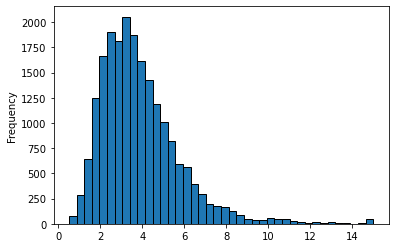

In [27]:
dados["renda"].plot.hist(bins=40, edgecolor="black")

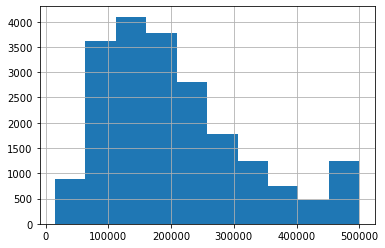

In [28]:
dados['valor'].hist()

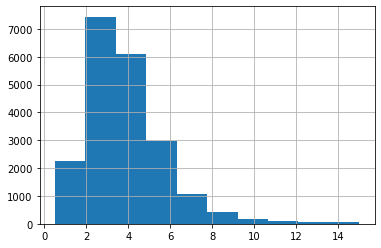

In [29]:
dados['renda'].hist()

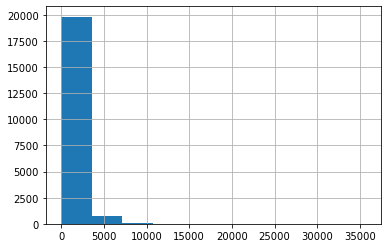

In [30]:
dados['população'].hist()

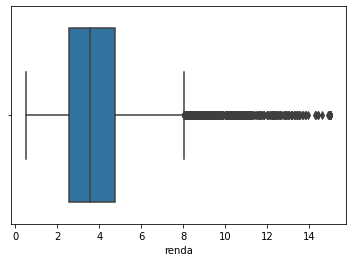

In [31]:
sns.boxplot(dados.renda)

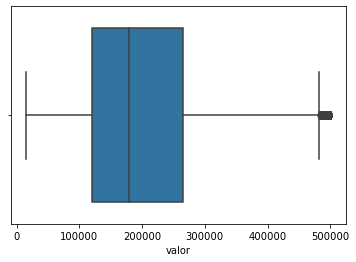

In [32]:
sns.boxplot(dados.valor)

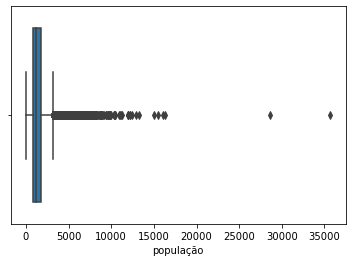

In [33]:
sns.boxplot(dados.população)

[Text(0, 0.5, 'SF'), Text(0.5, 0, 'Populacional SF')]

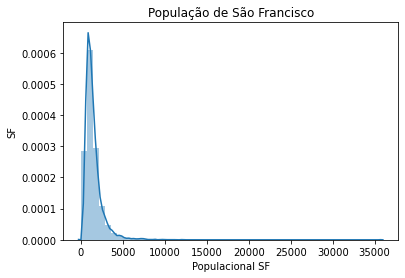

In [34]:
ax1 = sns.distplot(dados.população)
ax1.set_title("População de São Francisco")
ax1.set(xlabel = "Populacional SF", ylabel= "SF")

[Text(0, 0.5, 'Vendas'), Text(0.5, 0, 'Renda populacional')]

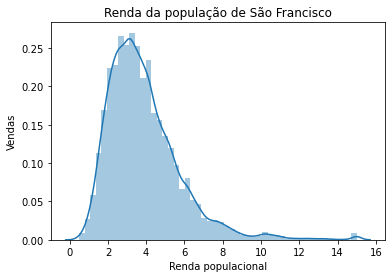

In [35]:
ax2 = sns.distplot(dados.renda)
ax2.set_title("Renda da população de São Francisco")
ax2.set(xlabel = "Renda populacional", ylabel= "Vendas")

[Text(0, 0.5, 'Vendas'), Text(0.5, 0, 'Valor de imoveis SF')]

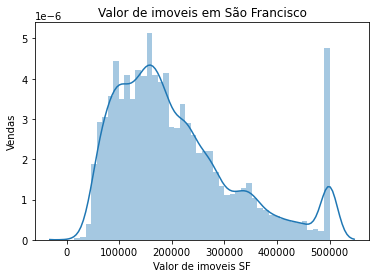

In [36]:
ax3 = sns.distplot(dados.valor)
ax3.set_title("Valor de imoveis em São Francisco")
ax3.set(xlabel = "Valor de imoveis SF", ylabel= "Vendas")

Text(0.5, 1.0, 'Dados de imoveis domicílios')

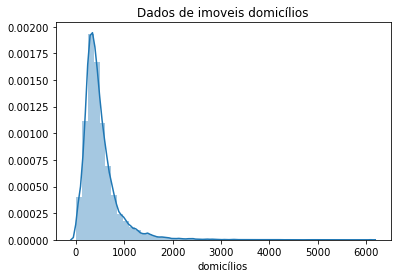

In [37]:
ax5 = sns.distplot(dados.domicílios)
ax5.set_title("Dados de imoveis domicílios")

[Text(0, 0.5, 'Vendas'), Text(0.5, 0, 'Renda populacional')]

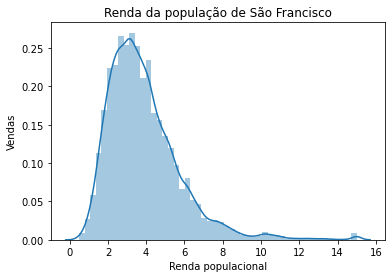

In [38]:
df = sns.distplot(dados.renda)
df.set_title("Renda da população de São Francisco")
df.set(xlabel = "Renda populacional", ylabel= "Vendas")

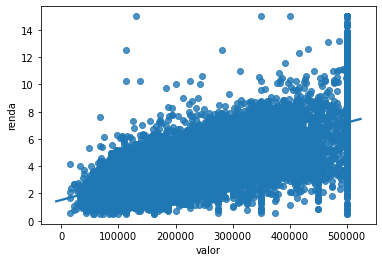

In [39]:
df5 = sns.regplot(x="valor", y="renda", data=dados)

Text(10.049999999999997, 0.5, 'O valor de rede da população')

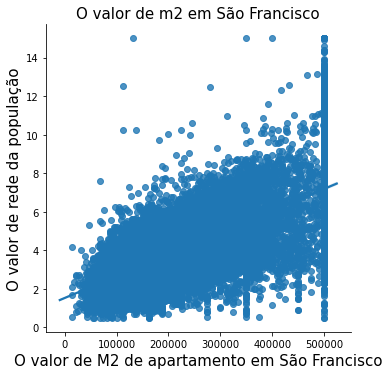

In [40]:
df = sns.lmplot(x="valor", y="renda", data=dados)

plt.title('O valor de m2 em São Francisco', fontsize = 15)
plt.xlabel("O valor de M2 de apartamento em São Francisco", fontsize = 15)
plt.ylabel("O valor de rede da população", fontsize = 15)

# Regressão linear modelo

In [41]:
x = dados["valor"]
y = dados["renda"]

In [42]:
x

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: valor, Length: 20640, dtype: float64

In [43]:
y

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: renda, Length: 20640, dtype: float64

Text(0.5, 1.0, 'Vendas dos apartamentos SF')

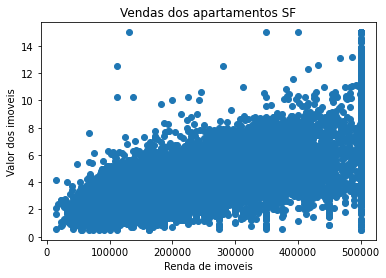

In [44]:
plt.scatter(x,y)
plt.xlabel("Renda de imoveis")
plt.ylabel("Valor dos imoveis")
plt.title("Vendas dos apartamentos SF")

**Correlação linear**

In [45]:
sample = dados.sample(n=200)
sample

,longitude,latitude,habitação,quartos,dormir,população,domicílios,renda,valor,proximidade do oceano
15351,-117.30,33.25,22.0,2329.0,419.0,1456.0,381.0,3.7933,131000.0,<1H OCEAN
9044,-118.13,34.69,34.0,2156.0,397.0,1269.0,388.0,2.7500,96800.0,INLAND
18717,-122.42,40.60,5.0,2614.0,433.0,1275.0,411.0,3.4464,122900.0,INLAND
8973,-118.41,34.00,37.0,1426.0,259.0,689.0,261.0,5.5284,331000.0,<1H OCEAN
17423,-120.45,34.64,27.0,2696.0,622.0,1322.0,543.0,3.0352,135400.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
13181,-117.72,33.97,16.0,13290.0,2062.0,6931.0,2023.0,5.2280,187800.0,<1H OCEAN
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY
17886,-121.96,37.39,20.0,1032.0,229.0,658.0,238.0,4.5062,219300.0,<1H OCEAN
6515,-118.04,34.07,39.0,2451.0,649.0,2536.0,648.0,2.3098,173100.0,<1H OCEAN


In [46]:
df1 = sample["valor"]
df2 = sample["renda"]

In [47]:
df1

15351    131000.0
9044      96800.0
18717    122900.0
8973     331000.0
17423    135400.0
           ...   
13181    187800.0
15709    460000.0
17886    219300.0
6515     173100.0
15903    284900.0
Name: valor, Length: 200, dtype: float64

In [48]:
df2

15351    3.7933
9044     2.7500
18717    3.4464
8973     5.5284
17423    3.0352
          ...  
13181    5.2280
15709    5.0049
17886    4.5062
6515     2.3098
15903    3.5912
Name: renda, Length: 200, dtype: float64

In [49]:
#sns.regplot(x="df1", y="df2", data=sample)

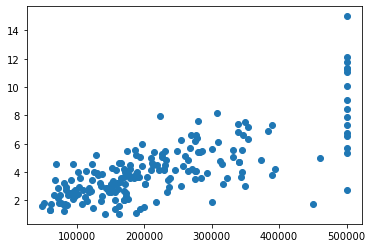

In [50]:
#Grafico 2
plt.scatter(df1,df2)

In [51]:
renda_populacional = dados["renda"]
renda_imoveis = dados["valor"]

In [52]:
renda_populacional.head(10)

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
5    4.0368
6    3.6591
7    3.1200
8    2.0804
9    3.6912
Name: renda, dtype: float64

In [53]:
renda_imoveis.head(10)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: valor, dtype: float64

In [54]:
treino, teste, treino_imoveis, teste_imoveis = train_test_split(renda_populacional, renda_imoveis)

In [55]:
renda_populacional

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: renda, Length: 20640, dtype: float64

In [56]:
renda_imoveis

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: valor, Length: 20640, dtype: float64

**Array**

In [57]:
teste = np.array(teste).reshape(len(teste),1)
teste

array([[2.9063],
       [3.1528],
       [2.9896],
       ...,
       [1.2542],
       [1.1136],
       [6.7587]])

In [58]:
treino = np.array(treino).reshape(len(treino),1)
treino

array([[5.1584],
       [3.4835],
       [1.3333],
       ...,
       [5.9094],
       [5.1795],
       [3.2229]])

In [59]:
treino_imoveis = np.array(treino_imoveis).reshape(len(treino_imoveis),1)
treino_imoveis

array([[444700.],
       [116700.],
       [ 42500.],
       ...,
       [261100.],
       [225400.],
       [108300.]])

In [60]:
teste_imoveis = np.array(teste_imoveis).reshape(len(teste_imoveis),1)
teste_imoveis

array([[192000.],
       [166800.],
       [252700.],
       ...,
       [ 76000.],
       [ 47800.],
       [388500.]])

# Modelo

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(treino, treino_imoveis)
modelo = LinearRegression()
modelo.fit(treino, treino_imoveis)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
modelo.intercept_

array([45633.88205282])

In [63]:
modelo.coef_

array([[41601.62524174]])

**Grafico da regressão linear**

Text(0, 0.5, 'Valor do M2')

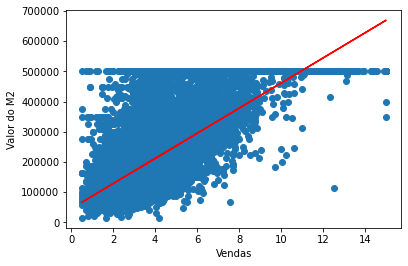

In [74]:
plt.scatter(treino, treino_imoveis)
plt.plot(treino, regressor.predict(treino), color = 'red')
plt.xlabel("Vendas")
plt.ylabel("Valor do M2")

# Modelo  regressão linear - RMSE, MSE, MAE.

**RMSE**

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(treino, treino_imoveis))
rmse

236666.88565042894

**MAE**

In [70]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(treino, treino_imoveis)
mae

206666.8793310659

**MSE**

In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(treino, treino_imoveis)
mse

56011214763.473206